In [1]:
%pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import random
from faker import Faker
from tabulate import tabulate

# Initialize Faker
fake = Faker()

# Real US companies
real_companies = [
    "Deloitte", "PwC", "EY", "KPMG", "McKinsey & Company",
    "Bain & Company", "Boston Consulting Group", "Accenture",
    "IBM", "Capgemini", "Cognizant", "Protiviti",
    "Johnson & Johnson", "Pfizer", "Merck", "Medtronic",
    "Stryker", "GE Healthcare", "Siemens Healthineers",
    "Amazon", "Google", "Microsoft", "Apple", "Meta",
    "Bechtel", "Fluor", "AECOM", "Turner Construction"
]

# Comprehensive role types with arrangements and travel profiles
role_types = {
    # Consulting
    "Management Consultant": {"arrangement": ["Hybrid", "In-Person"], "travel": "High"},
    "IT Consultant": {"arrangement": ["Remote", "Hybrid"], "travel": "Medium"},
    "Strategy Consultant": {"arrangement": ["Hybrid"], "travel": "Very High"},
    
    # Tech
    "Solutions Architect": {"arrangement": ["Remote", "Hybrid"], "travel": "Medium"},
    "Implementation Specialist": {"arrangement": ["Hybrid"], "travel": "High"},
    "Cloud Engineer": {"arrangement": ["Remote"], "travel": "Low"},
    
    # Healthcare
    "Clinical Specialist": {"arrangement": ["Hybrid"], "travel": "High"},
    "Medical Science Liaison": {"arrangement": ["Hybrid"], "travel": "Very High"},
    "Biomedical Engineer": {"arrangement": ["In-Person"], "travel": "Medium"},
    
    # Sales
    "Account Executive": {"arrangement": ["Hybrid", "Remote"], "travel": "Very High"},
    "Sales Engineer": {"arrangement": ["Hybrid"], "travel": "High"},
    "Business Development Manager": {"arrangement": ["Hybrid"], "travel": "High"},
    
    # Field Services
    "Field Service Technician": {"arrangement": ["In-Person"], "travel": "Extreme"},
    "Wind Turbine Technician": {"arrangement": ["In-Person"], "travel": "Extreme"},
    "Aviation Inspector": {"arrangement": ["In-Person"], "travel": "Very High"},
    
    # Professional Services
    "Auditor": {"arrangement": ["Hybrid"], "travel": "High"},
    "Risk Consultant": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "Tax Consultant": {"arrangement": ["Hybrid", "Remote"], "travel": "Low"},
    
    # Analytics
    "Data Analyst": {"arrangement": ["Remote", "Hybrid"], "travel": "Low"},
    "Business Analyst": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "BI Analyst": {"arrangement": ["Remote", "Hybrid"], "travel": "Low"},
    
    # Project Management
    "IT Project Manager": {"arrangement": ["Hybrid"], "travel": "High"},
    "Construction Project Manager": {"arrangement": ["In-Person"], "travel": "Extreme"},
    "Healthcare Project Manager": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "Consulting Project Manager": {"arrangement": ["Hybrid"], "travel": "Very High"},
    
    # Other
    "Training Specialist": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "Environmental Consultant": {"arrangement": ["Hybrid", "In-Person"], "travel": "High"},
    "Executive Coach": {"arrangement": ["Hybrid", "Remote"], "travel": "Medium"}
}

# US states with abbreviations
us_states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Florida': 'FL', 'Georgia': 'GA', 'Illinois': 'IL',
    'Indiana': 'IN', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'New Jersey': 'NJ',
    'New York': 'NY', 'North Carolina': 'NC', 'Ohio': 'OH', 'Pennsylvania': 'PA', 'Texas': 'TX',
    'Virginia': 'VA', 'Washington': 'WA'
}

# Reasons for travel
travel_reasons = {
    "Management Consultant": ["Client Workshop", "Progress Review", "Strategy Session"],
    "Data Analyst": ["Data Validation", "System Integration", "Stakeholder Meeting"],
    "Business Analyst": ["Process Mapping", "Requirements Gathering", "Stakeholder Workshop"],
    "IT Project Manager": ["System Implementation", "Vendor Meeting", "Go-Live Support"],
    "Construction Project Manager": ["Site Inspection", "Safety Review", "Contractor Meeting"],
    "default": ["Client Meeting", "Training Session", "Conference", "Product Demonstration"]
}

# Generate data
data = []
for _ in range(2000):
    company = random.choice(real_companies)
    role, role_info = random.choice(list(role_types.items()))
    arrangement = random.choice(role_info["arrangement"])
    travel_profile = role_info["travel"]
    
    # Set HQ location based on company type
    if any(x in company for x in ["Consult", "Deloitte", "PwC", "EY", "KPMG"]):
        hq_state = random.choice(['New York', 'Illinois', 'Massachusetts', 'California'])
    elif "Health" in company or "Med" in company:
        hq_state = random.choice(['Massachusetts', 'New Jersey', 'California', 'Minnesota'])
    elif company in ["Bechtel", "Fluor", "AECOM"]:
        hq_state = random.choice(['Texas', 'Virginia', 'California'])
    else:
        hq_state = random.choice(list(us_states.keys()))
    
    hq_city = fake.city()
    hq = f"{hq_city}, {us_states[hq_state]}"
    
    # Determine destinations based on travel intensity
    num_destinations = {
        "Low": random.randint(0, 1),
        "Medium": random.randint(1, 2),
        "High": random.randint(2, 3),
        "Very High": random.randint(3, 4),
        "Extreme": random.randint(4, 5)
    }[travel_profile]
    
    destinations = [f"{fake.city()}, {random.choice(list(us_states.values()))}" 
                   for _ in range(num_destinations)] if num_destinations > 0 else ["None"]
    
    # Get role-specific reasons
    reasons = travel_reasons.get(role, travel_reasons["default"])
    selected_reasons = random.sample(reasons, k=min(random.randint(1, 2), len(reasons)))
    
    data.append({
        "Company": company,
        "Role": role,
        "Work Arrangement": arrangement,
        "Travel Profile": travel_profile,
        "HQ": hq,
        "Destinations": "; ".join(destinations),
        "Frequency": random.choice(["Weekly", "Bi-weekly", "Monthly", "Quarterly"]),
        "Trip Duration (days)": random.randint(1, 14),
        "Reason for Travel": "; ".join(selected_reasons)
    })

# Create DataFrame
df = pd.DataFrame(data)

# Display sample
print("SAMPLE OF 10 RECORDS:")
print(tabulate(df.sample(10), headers="keys", tablefmt="grid", showindex=False))

# Save to CSV
df.to_csv("company_travel_data_full.csv", index=False)
print("\nFull dataset saved to company_travel_data_full.csv")

SAMPLE OF 10 RECORDS:
+--------------------+------------------------------+--------------------+------------------+-----------------------+---------------------------------------------------------------------------------+-------------+------------------------+-----------------------------------------+
| Company            | Role                         | Work Arrangement   | Travel Profile   | HQ                    | Destinations                                                                    | Frequency   |   Trip Duration (days) | Reason for Travel                       |
+====================+==============================+====================+==================+=======================+=================================================================================+=============+========================+=========================================+
| Capgemini          | Executive Coach              | Hybrid             | Medium           | Lambertshire, CA      | South Cassandrabu

In [3]:
df

,Company,Role,Work Arrangement,Travel Profile,HQ,Destinations,Frequency,Trip Duration (days),Reason for Travel
0,KPMG,Strategy Consultant,Hybrid,Very High,"West Travis, CA","Reyesfort, AL; Lake Jasonville, CT; Arianastad...",Quarterly,7,Product Demonstration; Training Session
1,Pfizer,Training Specialist,Hybrid,Medium,"New Jessicastad, IL","Lake Kennethshire, FL",Quarterly,10,Conference; Training Session
2,Medtronic,IT Project Manager,Hybrid,High,"Whitneyview, MN","North Kevinland, MA; Myersland, CO; Port Grego...",Bi-weekly,14,System Implementation
3,McKinsey & Company,Construction Project Manager,In-Person,Extreme,"Lovestad, IN","Nicholsfort, PA; Fletcherland, AL; New Lori, N...",Quarterly,12,Site Inspection; Safety Review
4,Fluor,IT Consultant,Hybrid,Medium,"Woodsfurt, VA","New Daniel, VA; Donnatown, AR",Weekly,6,Training Session; Conference
...,...,...,...,...,...,...,...,...,...
1995,IBM,Clinical Specialist,Hybrid,High,"West Davidville, AL","Lewisview, NY; Lake Michaelfurt, CA; Rogerstow...",Bi-weekly,9,Training Session; Client Meeting
1996,Capgemini,Account Executive,Remote,Very High,"Smithton, NY","Helenshire, PA; Port Karen, IL; South Devin, GA",Weekly,4,Training Session
1997,Boston Consulting Group,Biomedical Engineer,In-Person,Medium,"Hintonfurt, CA","New Zacharyland, VA",Monthly,3,Training Session; Conference
1998,Accenture,Healthcare Project Manager,Hybrid,Medium,"New Richard, MI","New Stephen, IL; Maryborough, AL",Monthly,7,Conference; Client Meeting


In [4]:
from sqlalchemy import create_engine

In [5]:
# Create SQLite in-memory database
engine = create_engine('sqlite:///company_travel.db')

# Save DataFrame to SQL database
df.to_sql('travel', engine, index=False, if_exists='replace')

In [6]:
# Load SQL extension
%load_ext sql

# Connect to database
%sql sqlite:///company_travel.db


In [7]:
%sql SELECT * from travel 

 * sqlite:///company_travel.db
Done.


Company,Role,Work Arrangement,Travel Profile,HQ,Destinations,Frequency,Trip Duration (days),Reason for Travel
KPMG,Strategy Consultant,Hybrid,Very High,"West Travis, CA","Reyesfort, AL; Lake Jasonville, CT; Arianastad, CT",Quarterly,7,Product Demonstration; Training Session
Pfizer,Training Specialist,Hybrid,Medium,"New Jessicastad, IL","Lake Kennethshire, FL",Quarterly,10,Conference; Training Session
Medtronic,IT Project Manager,Hybrid,High,"Whitneyview, MN","North Kevinland, MA; Myersland, CO; Port Gregory, AR",Bi-weekly,14,System Implementation
McKinsey & Company,Construction Project Manager,In-Person,Extreme,"Lovestad, IN","Nicholsfort, PA; Fletcherland, AL; New Lori, NY; Robertbury, VA",Quarterly,12,Site Inspection; Safety Review
Fluor,IT Consultant,Hybrid,Medium,"Woodsfurt, VA","New Daniel, VA; Donnatown, AR",Weekly,6,Training Session; Conference
Apple,Tax Consultant,Hybrid,Low,"West Brian, CT","Billyfurt, OH",Bi-weekly,9,Conference; Product Demonstration
Meta,Consulting Project Manager,Hybrid,Very High,"South Dylanfort, NC","West Chad, AK; Christopherport, MA; Lake Timothyville, VA",Quarterly,3,Client Meeting
Stryker,Clinical Specialist,Hybrid,High,"Port Amanda, NJ","Port Antonio, MI; West Adamburgh, CT; Reedchester, OH",Weekly,8,Product Demonstration
Johnson & Johnson,Aviation Inspector,In-Person,Very High,"Trujilloland, MA","West Dennis, NC; Joshualand, WA; East Davidstad, AR; Lake Bradley, VA",Weekly,6,Training Session; Client Meeting
Medtronic,Training Specialist,Hybrid,Medium,"Angelmouth, MN","Wallacemouth, NC",Monthly,4,Product Demonstration


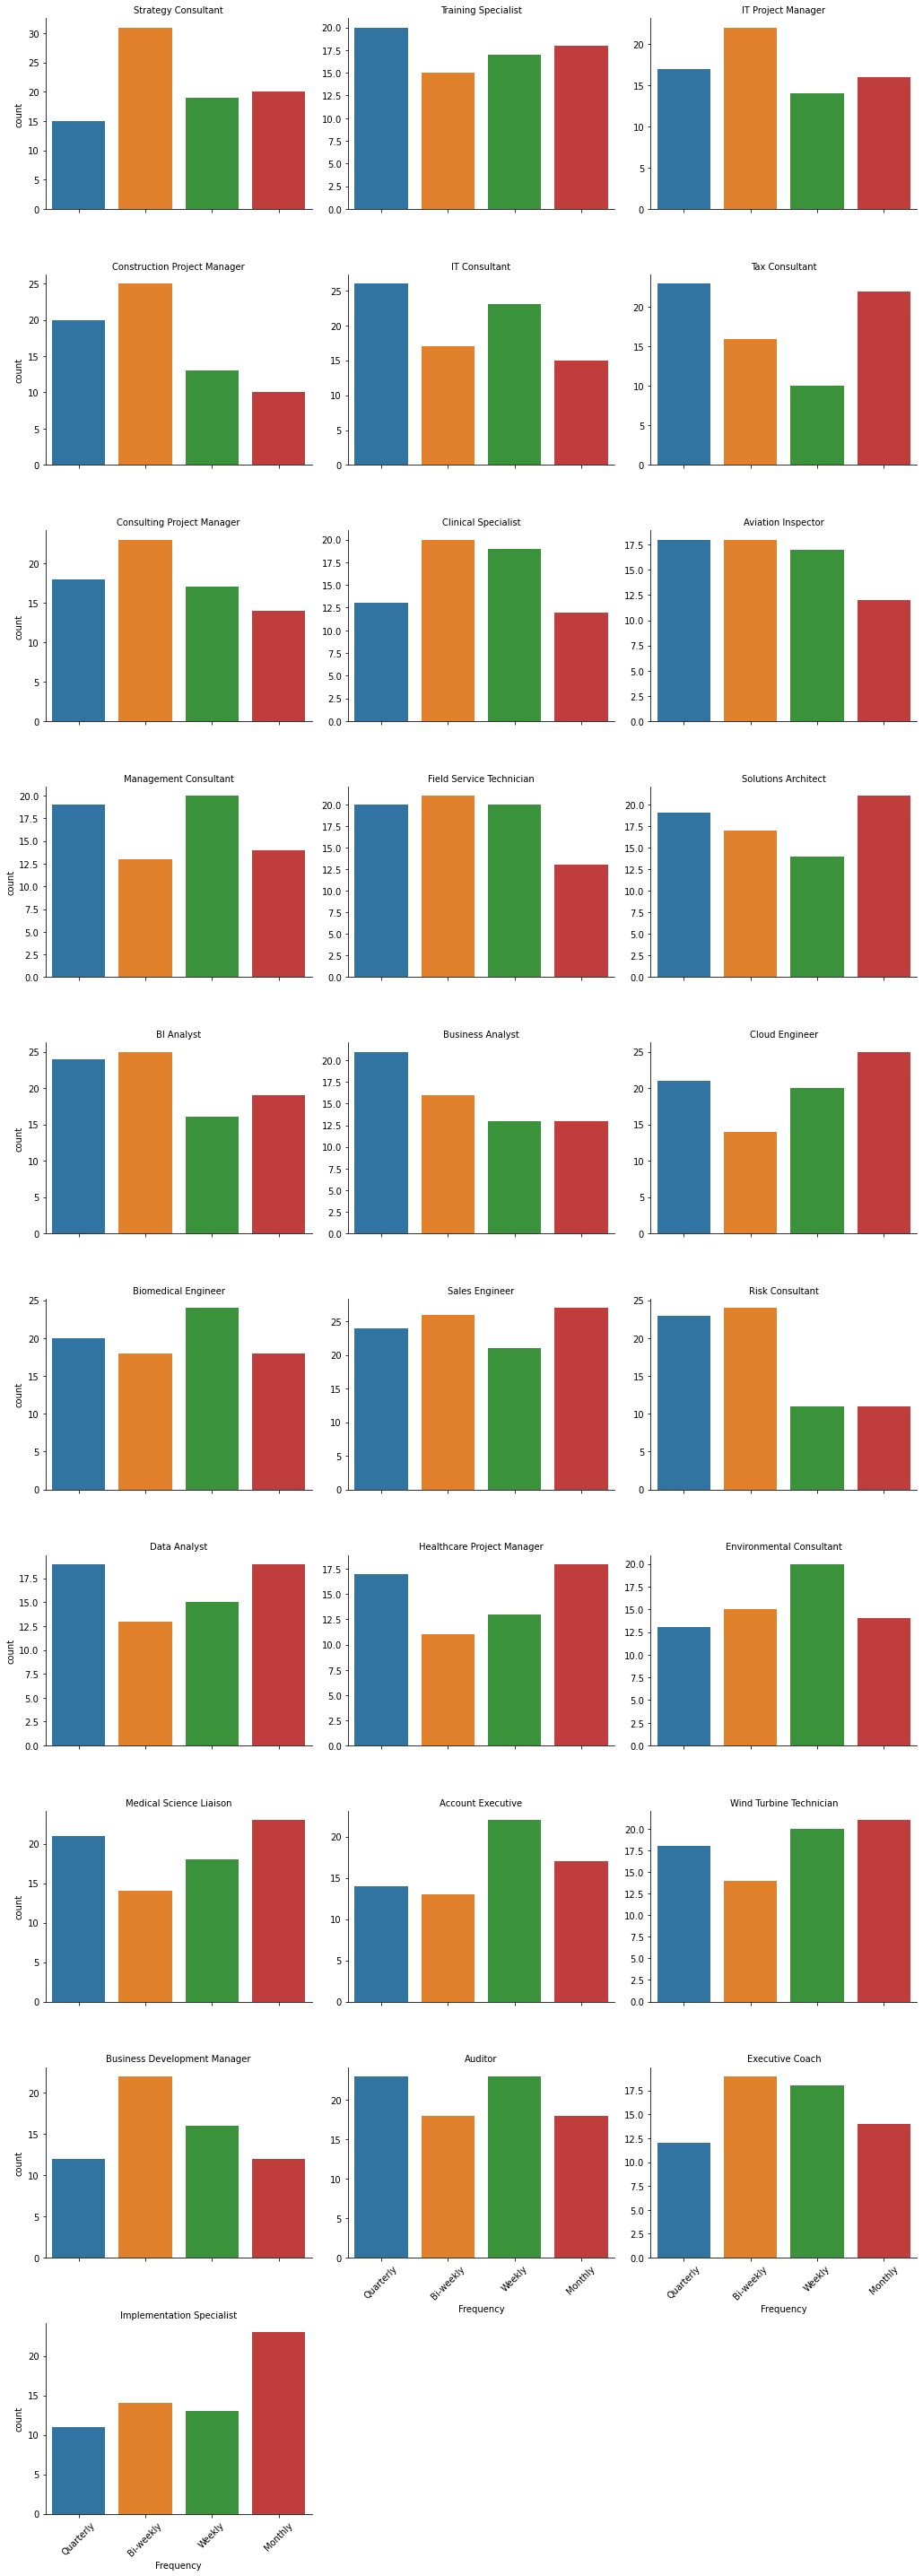

In [8]:
# Travel frequency by role

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(
    data=df, 
    x='Frequency', 
    kind='count', 
    col='Role', 
    col_wrap=3,  # Adjust columns per row
    sharey=False,
    height=4,
    aspect=1.2
)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

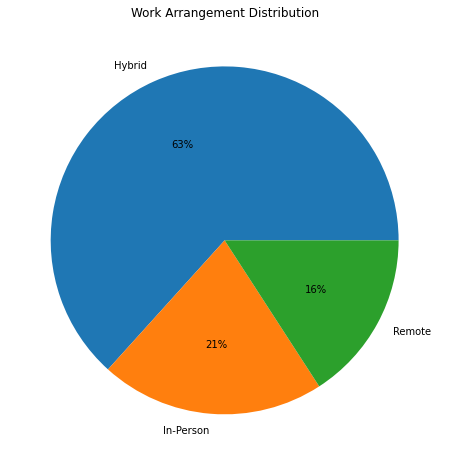

In [9]:
# Work arrangement distribution
arrangement_counts = df['Work Arrangement'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(arrangement_counts, labels=arrangement_counts.index, autopct='%0.0f%%')
plt.title('Work Arrangement Distribution')
plt.show()

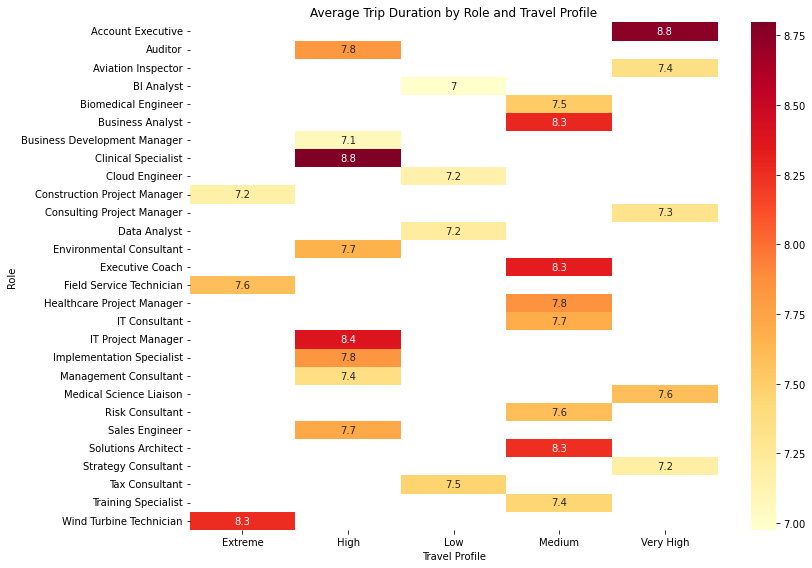

In [10]:
# Travel duration by role heatmap
travel_pivot = df.pivot_table(index='Role', 
                             columns='Travel Profile', 
                             values='Trip Duration (days)', 
                             aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(travel_pivot, annot=True, cmap='YlOrRd')
plt.title('Average Trip Duration by Role and Travel Profile')
plt.tight_layout()
plt.show()

In [11]:
# Companies with most travel-intensive roles
company_travel = df.groupby('Company')['Travel Profile'].value_counts().unstack()
company_travel['Travel Score'] = (company_travel.get('Extreme',0)*4 +
                                company_travel.get('Very High',0)*3 +
                                company_travel.get('High',0)*2 +
                                company_travel.get('Medium',0)*1)

company_travel.sort_values('Travel Score', ascending=False).head(10)

Travel Profile,Extreme,High,Low,Medium,Very High,Travel Score
Company,,,,,,
Medtronic,9,18,17,33,18,159
Capgemini,14,18,8,20,15,157
Deloitte,12,27,7,22,11,157
Cognizant,11,17,9,16,20,154
McKinsey & Company,8,22,10,27,16,151
KPMG,11,19,14,21,13,142
Siemens Healthineers,8,23,11,16,15,139
Johnson & Johnson,8,28,8,21,10,139
Google,5,28,12,26,12,138


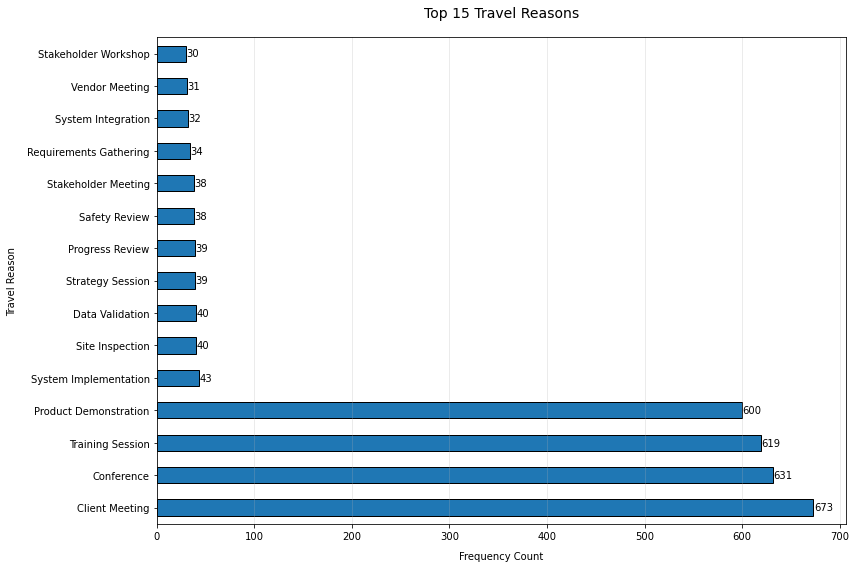


Top Travel Reasons:
Client Meeting            673
Conference                631
Training Session          619
Product Demonstration     600
System Implementation      43
Site Inspection            40
Data Validation            40
Strategy Session           39
Progress Review            39
Safety Review              38
Stakeholder Meeting        38
Requirements Gathering     34
System Integration         32
Vendor Meeting             31
Stakeholder Workshop       30


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Ensure your DataFrame is properly loaded
# df = pd.read_csv('your_data.csv')  # Uncomment if loading from file

# 1. Data Preparation - More robust version
def clean_reasons(reason_str):
    """Handle potential NaN values and clean reason strings"""
    if pd.isna(reason_str):
        return []
    return [r.strip() for r in str(reason_str).split(';') if r.strip()]

# Extract and clean all reasons
all_reasons = []
for reasons in df['Reason for Travel'].apply(clean_reasons):
    all_reasons.extend(reasons)

# 2. Count reasons safely
if not all_reasons:  # Check if list is empty
    print("No travel reasons found in the data!")
else:
    reason_counts = pd.Series(Counter(all_reasons)).sort_values(ascending=False)
    
    # 3. Plotting with enhanced formatting
    plt.figure(figsize=(12, 8))
    ax = reason_counts.head(15).plot(kind='barh', color='#1f77b4', edgecolor='black')
    
    # Add value labels
    for i, v in enumerate(reason_counts.head(15)):
        ax.text(v + 0.5, i, str(v), color='black', va='center')
    
    plt.title('Top 15 Travel Reasons', pad=20, fontsize=14)
    plt.xlabel('Frequency Count', labelpad=10)
    plt.ylabel('Travel Reason', labelpad=10)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 4. Optional: Display the raw counts
    print("\nTop Travel Reasons:")
    print(reason_counts.head(15).to_string())

In [23]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [25]:
#HQ location
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter

# Initialize geolocator with a user_agent
geolocator = Nominatim(user_agent="company_travel_analysis")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Adds rate limiting

# Create base map
us_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Process a sample of 50 HQs for demo (remove .sample(50) for full dataset)
for hq in df['HQ'].sample(50).unique():
    try:
        location = geocode(hq)
        if location:
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=hq,
                icon=folium.Icon(color='blue')
            ).add_to(us_map)
    except:
        continue

us_map

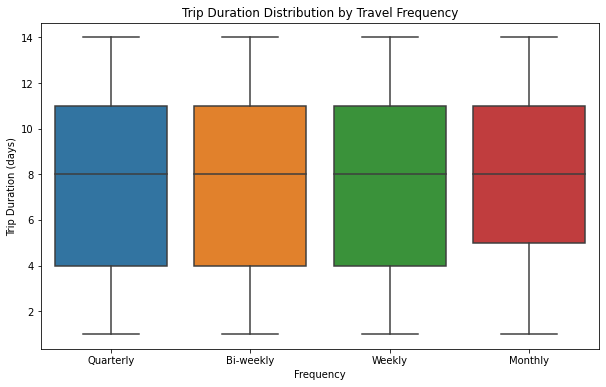

In [13]:
# Relationship between trip duration and frequency
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Frequency', y='Trip Duration (days)')
plt.title('Trip Duration Distribution by Travel Frequency')
plt.show()

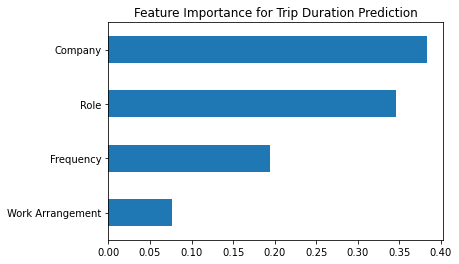

In [14]:
# Predict trip duration
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare data
model_df = df.copy()
encoders = {col: LabelEncoder() for col in ['Role', 'Company', 'Work Arrangement', 'Frequency']}
for col, encoder in encoders.items():
    model_df[col] = encoder.fit_transform(model_df[col])

X = model_df[['Role', 'Company', 'Work Arrangement', 'Frequency']]
y = model_df['Trip Duration (days)']

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Show feature importance
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title('Feature Importance for Trip Duration Prediction')
plt.show()

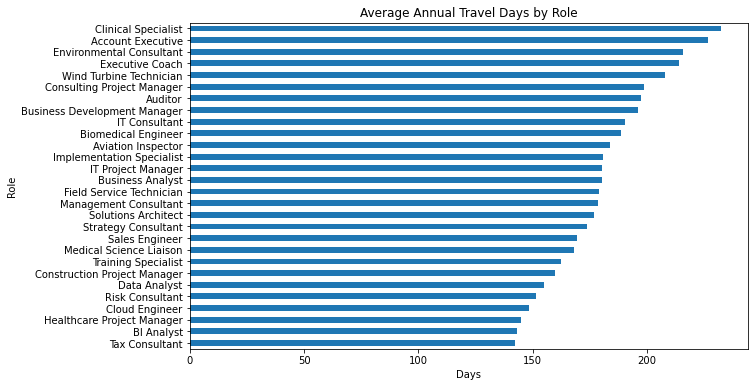

In [17]:
# Simulate annual travel patterns
df['Annual Trip Days'] = df['Frequency'].map({
    'Weekly': 52,
    'Bi-weekly': 26,
    'Monthly': 12,
    'Quarterly': 4
}) * df['Trip Duration (days)']

annual_travel = df.groupby('Role')['Annual Trip Days'].mean().sort_values()

plt.figure(figsize=(10,6))
annual_travel.plot(kind='barh')
plt.title('Average Annual Travel Days by Role')
plt.xlabel('Days')
plt.show()